## Data Cleaning and Quality Control for Pregnancy Deep Phenotyping Metabolomics Data
##### Kayla Xu, Piekos Lab
##### 1/28/2026

In [1]:
# set up environment
import pandas as pd
import numpy as np
import scipy.stats as sp
from scipy import ndimage as nd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import logging
import sys

In [2]:
# read in csv files
exp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_expression.csv", index_col=0)
batch = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_batch.csv", index_col=0)
comp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_compounds.csv", index_col=0)
#t_exp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_exp_test.csv")

1. Convert any blank, "NA", or 0 values for analyte measuremnts to standard missing value

In [3]:
def convert_missing(x):
    try:
        val = float(x)
        if val == 0:
            return np.nan
        else:
            return val
    except:
        return np.nan

exp = exp.map(convert_missing)
exp

,01,02,p1,p2,p3,p4,p5,p6,p7,p8,...,p3695,p3696,p3697,p3698,p3699,p3700,p3701,p3702,p3703,p3704
Sample_ID,,,,,,,,,,,,,,,,,,,,,
Pooled Cntrl,NaN,NaN,1.529698e+09,9.609349e+08,6.969368e+08,6.273636e+08,4.496688e+08,1.627703e+08,1.656823e+08,2.721866e+08,...,27488.284023,7203.652750,7677.504597,1342.107419,9610.930373,39079.646816,32186.048274,1601.922548,4823.045917,2013.510488
Pooled Cntrl,NaN,NaN,1.368645e+09,1.017308e+09,7.297922e+08,6.216437e+08,4.032618e+08,1.658927e+08,1.658927e+08,2.758879e+08,...,23529.385751,7018.815397,10839.720606,1334.575697,2107.552582,37595.243490,14915.134760,1483.575237,4975.115785,1822.346712
Pooled Cntrl,NaN,NaN,1.529095e+09,1.024928e+09,7.537896e+08,6.528907e+08,4.176116e+08,1.691492e+08,1.691136e+08,2.799403e+08,...,32523.477547,6763.429783,16598.414538,1365.399845,9541.553119,41865.668458,30473.225647,1565.337035,10850.491229,1234.040520
Pooled Cntrl,NaN,NaN,1.594295e+09,1.061045e+09,7.727009e+08,6.619380e+08,3.661752e+08,1.678279e+08,1.678279e+08,2.916086e+08,...,35486.556219,5281.358186,6002.694725,1960.021509,3823.302236,27640.514842,34969.834441,2063.441685,3151.114966,1291.215513
Pooled Cntrl,NaN,NaN,1.558062e+09,1.075289e+09,7.655375e+08,6.626260e+08,3.324415e+08,1.634159e+08,1.656492e+08,2.939343e+08,...,36362.884200,5176.081144,3629.736853,1781.069954,3374.391045,23745.862385,23107.849268,9204.205117,5361.216328,1412.393842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP3-0409,399287.829141,1.818930e+07,1.354813e+09,1.521910e+08,5.321273e+08,1.617649e+07,4.847604e+08,2.317692e+06,2.798594e+06,6.827049e+07,...,2476.141617,1718.449783,47208.704015,21672.795377,13064.466449,30018.671239,3779.421277,112197.881939,2141.515525,4221.543097
DP3-0416,435095.699504,2.299017e+07,1.246003e+09,1.441815e+08,3.709081e+08,1.821745e+07,3.968532e+08,2.166746e+06,2.166746e+06,1.160527e+08,...,6645.010324,5135.848653,43469.674374,2321.027123,36859.753509,23856.126696,5112.783090,1738.518821,22113.724282,1038.665688
DP3-0419,272278.020734,1.864842e+07,1.280463e+09,2.599678e+08,7.597815e+08,2.831243e+07,6.925312e+08,2.621542e+06,2.621542e+06,2.159653e+08,...,12111.085549,13529.689066,21175.352211,12954.678928,51933.051727,50097.705991,5257.716925,7674.302380,8809.518392,1021.711583


2. Identify QC vs biological samples and separate these further by batch

In [4]:
is_pooled = ["Pooled" in s for s in exp.index]
pooled = exp.iloc[is_pooled,:]

is_sample = ["Pooled" not in s for s in exp.index]
sample_exp = exp.iloc[is_sample,:]


In [5]:
pooled['batch'] = batch["batch"][is_pooled]

In [6]:
sample_exp['batch'] = batch["batch"][is_sample]

In [7]:
unique_batches = batch["batch"].unique()
exp_data = {} # dictionary of metabolomic expression split by QC/biological sample and batch (e.g. id = "Pooled_32425")
for b in unique_batches:
    exp_data["Pooled_" + str(b)] = pooled[pooled['batch'] == b]
    exp_data["Samples_" + str(b)] = sample_exp[sample_exp['batch'] == b]

3. Check for the internal quality control of samples by using the standard run - these are the yellow boxes with red text in the files. For all biological samples, for each standard calculate the Median Absolute Deviation. FIlter out any sample that is >5 MAD (Threshold = Median - (5xMAD)). Track any samples that fail this test in a log file

In [8]:
# standard runs = 01 and 02, only in samples
batch1 = exp_data["Samples_32425"]
batch2 = exp_data["Samples_62323"]

b1_id = "32425"
b2_id = "62323"

In [9]:
# calculate MAD for each batch and standard run
mad_101 = sp.median_abs_deviation(batch1["01"])
mad_102 = sp.median_abs_deviation(batch1["02"])
mad_201 = sp.median_abs_deviation(batch2["01"])
mad_202 = sp.median_abs_deviation(batch2["02"])

# calculate median for each batch and standard run
med_101 = nd.median(batch1["01"])
med_102 = nd.median(batch1["02"])
med_201 = nd.median(batch2["01"])
med_202 = nd.median(batch2["02"])

In [10]:
# create mask of all values that don't pass filter
fail_101 = (batch1["01"] < med_101 - 5*mad_101) | (batch1["01"] > med_101 + 5*mad_101)
fail_102 = (batch1["02"] < med_102 - 5*mad_102) | (batch1["02"] > med_102 + 5*mad_102)

fail_201 = (batch2["01"] < med_201 - 5*mad_201) | (batch2["01"] > med_201 + 5*mad_201)
fail_202 = (batch2["02"] < med_202 - 5*mad_202) | (batch2["02"] > med_202 + 5*mad_202)


In [11]:
# generate log file
logging.basicConfig(
    filename='MTBL_cleaning.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filemode='w'  # Use 'w' to overwrite the file each run, or 'a' to append
)
logging.info("Initializing metabolomics cleaning pipeline...")
#logging.warning("Missing metadata in row 45.")
#logging.error("Failed to load reference database.")


In [12]:
# remove samples that fail check
failed = batch1.index[fail_102]
for sample in failed:
    logging.warning("QC: Sample " + sample + "_" + b1_id + " failed Median Absolute Deviation threshold test.")
    batch1 = batch1.drop(index=sample)
    
exp_data["Samples_32425"] = batch1 


4. Filter out any individual biological samples with >50% missingness. Track any samples that fail this test in a log file.

In [13]:
fail_missing = batch1.isna().sum(axis=1) > len(batch1.index)
f = batch1.index[fail_missing]
for s in f:
    logging.warning("QC: Sample " + s + " failed >50% missingness test.")
    batch1 = batch1.drop(index=s)

exp_data["Samples_32425"] = batch1  

5. Calculate relative standard deviation (RSD) in QC Pools (RSD = SD/Mean * 100) - remove any metabolites with an RSD < 30%.


In [14]:
pool1 = exp_data["Pooled_32425"]
pool2 = exp_data["Pooled_62323"]

In [15]:
RSD1 = (pool1.std()/pool1.mean())*100 
RSD2 = (pool2.std()/pool2.mean())*100 

In [16]:
failed_RSD = RSD1.index[list(RSD1 > 30) or list(RSD2 > 30)]

In [17]:
for m in failed_RSD:
    logging.warning("QC: Compound " + str(m) + " failed the RSD < 30 check\n" + 10*'\t' + "Pooled_32425 RSD = " + str(RSD1[m]) + "\n" + 10*'\t' + "Pooled_62323 RSD = " + str(RSD2[m]))
    exp_data["Pooled_32425"] = exp_data["Pooled_32425"].drop(columns=m)
    exp_data["Pooled_62323"] = exp_data["Pooled_62323"].drop(columns=m)
    exp_data["Samples_32425"] = exp_data["Samples_32425"].drop(columns=m)
    exp_data["Samples_62323"] = exp_data["Samples_62323"].drop(columns=m)


6. Remove any analyses with >20% missingness (note this can be done in the same looping step as the RSD QC check). Double-check that no group has signficantly differential patterns of missingness for discarded analyses

In [18]:
batch1 = exp_data["Samples_32425"].isna().sum()
batch2 = exp_data["Samples_62323"].isna().sum()

In [19]:
for m in batch1.index[(batch1 > 0.2*len(batch1)) | (batch2 > 0.2*len(batch2))]:
    logging.warning("QC: Compound " + str(m) + " failed the <20% missingness check")
    exp_data["Pooled_32425"] = exp_data["Pooled_32425"].drop(columns=m)
    exp_data["Pooled_62323"] = exp_data["Pooled_62323"].drop(columns=m)
    exp_data["Samples_32425"] = exp_data["Samples_32425"].drop(columns=m)
    exp_data["Samples_62323"] = exp_data["Samples_62323"].drop(columns=m)

7. Generate non-batch corrected PCA plot (for comparison to after batch normalization in which the color of the sample dots are the batches they were run in

In [20]:
all_data = pd.concat([exp_data["Samples_32425"], exp_data["Samples_62323"]])


In [21]:
batch = all_data["batch"]
all_data = all_data.drop(["batch"], axis=1)

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)

In [23]:
# 3. Apply PCA
# We want to reduce the data to 2 dimensions for plotting
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [24]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [25]:
pca_df['batch'] = list(batch)

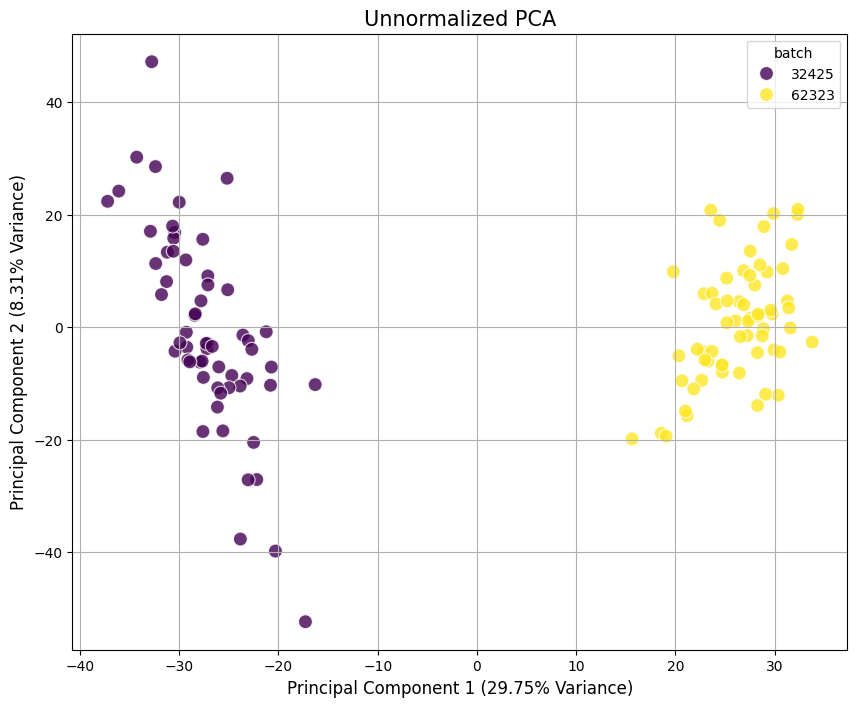

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='batch', 
    data=pca_df, 
    palette='viridis', 
    s=100,      # Marker size
    alpha=0.8   # Transparency
)

# Add titles and labels
plt.title('Unnormalized PCA', fontsize=15)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)', fontsize=12)
plt.grid(True)
plt.show()

8. Batch normalization: good news we have biological replicates run in both batches so we can do a much better way to batch normalize than quantile normalization!
    1. Identify the batch replicates (sample IDs that appear in both batches) - log how many batch replicates we have.
    2. Calculate the ratio for each sample replicate pair (batch 2 value / batch 1 value) for each metabolite. Store these in a list for each metabolite making sure to exclude any outliers.
    3. Take the median ratio for each metabolite
    4. Calculate the correction factor (Correction factor = 1 / Median ratio) for each metabolite
    5. Apply the correction factor to all batch 2 samples

In [27]:
batch1 = exp_data["Samples_32425"].drop(['batch'], axis=1)
batch2 = exp_data["Samples_62323"].drop(['batch'], axis=1)

In [28]:
replicates = list(set(batch1.index) & set(batch2.index))

In [29]:
logging.info("Initializing batch normalization with " + str(len(replicates)) + " biological replicates.")

In [30]:
rep1 = batch1.loc[replicates,:]
rep2 = batch2.loc[replicates,:]

In [31]:
ratios = rep2 / rep1

In [32]:
mad = sp.median_abs_deviation(ratios)

In [33]:
med = ratios.median()

In [34]:
upper = med + 5*mad
lower = med - 5*mad

In [35]:
ratios

,01,02,p1,p3,p4,p5,p6,p7,p8,p9,...,p3683,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0105,26.422342,0.860653,1.003347,2.036985,40.798049,0.778172,108.941282,89.719960,2.127273,0.861805,...,0.722768,8.257657,0.387121,0.369152,0.220261,1.790765,0.217754,0.820318,1.832559,1.024392
DP3-0034,24.834524,0.687263,1.117366,1.709691,14.227123,0.943159,84.143403,61.771536,3.883712,0.912178,...,0.507146,0.638643,0.355536,0.273873,0.296701,3.467569,0.069408,1.054171,1.588717,1.256206
DP3-0048,24.477570,0.658722,1.305646,1.429702,23.792580,1.291109,45.531905,46.093534,2.461956,0.831503,...,0.705208,0.705142,0.261848,0.125628,0.374451,0.306075,0.375887,0.658188,0.638205,0.794440
DP3-0124,23.738560,0.682314,1.221521,1.639151,3.110994,1.301464,8.678023,8.778507,3.377310,1.199570,...,1.481887,2.924076,1.712806,1.473882,0.235058,1.178243,0.113298,1.005408,1.841836,1.453490
DP3-0080,22.563051,0.863062,1.071519,1.740343,52.967769,1.065540,53.919270,54.821262,1.518249,1.078197,...,0.686187,1.072402,0.083063,0.960464,0.199193,5.793056,0.637471,0.920490,1.120456,0.093572
DP3-0092,21.335718,0.540293,1.022377,1.929408,28.870359,1.476356,62.352444,62.352444,4.751950,0.829494,...,0.609230,13.114077,3.274742,0.205171,0.325069,0.107044,0.422524,0.972356,11.084421,1.237882
DP3-0112,18.494015,0.769220,1.065993,1.541477,8.344704,0.877551,126.720617,126.931762,1.616746,0.847075,...,0.912400,0.591423,1.466717,0.056104,0.092524,1.348631,0.079487,0.639205,0.164232,1.520793
DP3-0140E,19.776105,0.916396,1.122072,1.707732,1.173767,0.910117,0.619078,0.625547,3.035255,1.209644,...,0.190007,0.400973,0.914518,6.325738,0.209537,3.021630,0.085662,0.506995,1.087354,1.317587
DP3-0025,17.510866,0.691397,1.168563,1.389080,37.486665,1.256765,62.778945,62.760143,2.138320,0.934097,...,6.098890,1.024372,4.137581,0.098330,0.188809,0.097465,0.352762,0.745145,16.693045,1.199419


In [36]:
med_ratios = {}
# calculate median ratio
for m in ratios.columns:
    temp = ratios.loc[list(ratios[m] < upper[m]) and list(ratios[m] > lower[m]), m]
    med_ratios[m] = temp.median()

In [37]:
correction_factors = {k: 1/v for k, v in med_ratios.items()}

In [38]:
len(correction_factors)
batch2 = exp_data["Samples_62323"].drop(['batch'], axis=1)
batch2_back = batch2

In [ ]:
for m in batch2.columns:
    old = batch2[m]
    batch2[m] = old*correction_factors[m]

In [40]:
batch2_back


,01,02,p1,p3,p4,p5,p6,p7,p8,p9,...,p3683,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0005,373902.527352,2.093408e+07,1.116319e+09,4.849444e+08,4.046867e+07,4.297786e+08,5.013581e+06,5.086709e+06,2.001469e+08,3.520209e+08,...,36833.034819,36311.562887,4664.788524,362602.028264,17406.215046,6817.947207,38283.038219,46791.030701,9730.972075,3942.806578
DP3-0006,295812.105480,2.788433e+07,1.335430e+09,4.532912e+08,3.348233e+07,2.962679e+08,3.474501e+06,3.507175e+06,2.491128e+08,3.381767e+08,...,21245.232387,48186.841121,6226.341119,14059.774860,13427.871120,995.889003,33150.308338,21558.363015,2064.083687,1025.242943
DP3-0008,380441.532572,2.059127e+07,1.396138e+09,3.991920e+08,4.477024e+07,3.347888e+08,2.936550e+06,2.962444e+06,1.139734e+08,3.522575e+08,...,11369.520869,60982.296807,5171.926379,21323.024945,14217.500040,1729.559615,11816.240052,43337.876911,2378.856017,1127.032923
DP3-0009,367419.382490,2.656853e+07,1.380878e+09,5.604231e+08,4.438622e+07,3.752877e+08,5.631706e+06,5.690252e+06,1.163947e+08,3.888595e+08,...,13032.957467,55492.748402,10256.731073,58143.487721,18953.827284,9887.181845,56635.782136,39604.677285,1808.803281,1125.465210
DP3-0018,386117.169284,1.960375e+07,1.261540e+09,3.712758e+08,2.850134e+07,3.258065e+08,2.650822e+06,2.674958e+06,8.454573e+07,2.525871e+08,...,30705.904764,27670.863102,43750.715239,84837.998959,14980.902727,1864.171939,46501.293437,18028.321710,15447.429359,1412.596318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP3-0207,409351.297026,3.226045e+07,1.338085e+09,5.156126e+08,5.311147e+06,3.580833e+08,1.820221e+06,1.865587e+06,1.491465e+08,3.507099e+08,...,63498.341902,25764.353897,2889.919571,13747.817365,20039.031762,9410.109742,32045.680381,17111.163659,2615.767298,1389.707976
DP3-0214,427379.990402,2.186885e+07,1.188410e+09,5.724002e+08,3.875773e+06,3.465332e+08,2.449572e+06,2.506963e+06,1.815956e+08,2.956411e+08,...,19935.245287,31479.954705,2877.770219,15428.810848,19157.347965,1518.212048,18888.209853,62834.351171,1660.584534,1040.279546
DP3-0216,405417.909124,2.339024e+07,1.329196e+09,5.174361e+08,2.765870e+06,3.097201e+08,2.633048e+06,2.699059e+06,1.984296e+08,2.681586e+08,...,13783.911643,35724.670285,4507.618551,12766.266479,14955.223006,2477.048898,29881.424374,18606.781597,1849.766955,942.616310


In [41]:
batch2

,01,02,p1,p3,p4,p5,p6,p7,p8,p9,...,p3683,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0005,373902.527352,2.093408e+07,1.116319e+09,4.849444e+08,4.046867e+07,4.297786e+08,5.013581e+06,5.086709e+06,2.001469e+08,3.520209e+08,...,36833.034819,36311.562887,4664.788524,362602.028264,17406.215046,6817.947207,38283.038219,46791.030701,9730.972075,3942.806578
DP3-0006,295812.105480,2.788433e+07,1.335430e+09,4.532912e+08,3.348233e+07,2.962679e+08,3.474501e+06,3.507175e+06,2.491128e+08,3.381767e+08,...,21245.232387,48186.841121,6226.341119,14059.774860,13427.871120,995.889003,33150.308338,21558.363015,2064.083687,1025.242943
DP3-0008,380441.532572,2.059127e+07,1.396138e+09,3.991920e+08,4.477024e+07,3.347888e+08,2.936550e+06,2.962444e+06,1.139734e+08,3.522575e+08,...,11369.520869,60982.296807,5171.926379,21323.024945,14217.500040,1729.559615,11816.240052,43337.876911,2378.856017,1127.032923
DP3-0009,367419.382490,2.656853e+07,1.380878e+09,5.604231e+08,4.438622e+07,3.752877e+08,5.631706e+06,5.690252e+06,1.163947e+08,3.888595e+08,...,13032.957467,55492.748402,10256.731073,58143.487721,18953.827284,9887.181845,56635.782136,39604.677285,1808.803281,1125.465210
DP3-0018,386117.169284,1.960375e+07,1.261540e+09,3.712758e+08,2.850134e+07,3.258065e+08,2.650822e+06,2.674958e+06,8.454573e+07,2.525871e+08,...,30705.904764,27670.863102,43750.715239,84837.998959,14980.902727,1864.171939,46501.293437,18028.321710,15447.429359,1412.596318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP3-0207,409351.297026,3.226045e+07,1.338085e+09,5.156126e+08,5.311147e+06,3.580833e+08,1.820221e+06,1.865587e+06,1.491465e+08,3.507099e+08,...,63498.341902,25764.353897,2889.919571,13747.817365,20039.031762,9410.109742,32045.680381,17111.163659,2615.767298,1389.707976
DP3-0214,427379.990402,2.186885e+07,1.188410e+09,5.724002e+08,3.875773e+06,3.465332e+08,2.449572e+06,2.506963e+06,1.815956e+08,2.956411e+08,...,19935.245287,31479.954705,2877.770219,15428.810848,19157.347965,1518.212048,18888.209853,62834.351171,1660.584534,1040.279546
DP3-0216,405417.909124,2.339024e+07,1.329196e+09,5.174361e+08,2.765870e+06,3.097201e+08,2.633048e+06,2.699059e+06,1.984296e+08,2.681586e+08,...,13783.911643,35724.670285,4507.618551,12766.266479,14955.223006,2477.048898,29881.424374,18606.781597,1849.766955,942.616310


In [42]:
batch2[m] = batch2[m]*correction_factors[m]

In [43]:
batch2[m]

Sample_ID
DP3-0005     3161.721096
DP3-0006      822.138286
DP3-0008      903.763271
DP3-0009      902.506128
DP3-0018     1132.755435
                ...     
DP3-0207     1114.401363
DP3-0214      834.196079
DP3-0216      755.880314
DP3-0233E     855.154715
DP3-0265      786.759083
Name: p3704, Length: 62, dtype: float64